In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# function for loading specific invidual PLT file given file_path
def load_plt_file(file_path):

    # load file as df while skipping first six rows (unneeded header info)
    plt_df = pd.read_csv(file_path, skiprows = 6, header = None)

    # assign columns
    plt_df.columns = [
        'latitude',
        'longitude', 
        'zero_field',
        'altitude_ft',
        'date_days',
        'date_string',
        'time_string'
    ]

    # create datetime object column
    plt_df['timestamp'] = pd.to_datetime(plt_df['date_string'] + " " + plt_df['time_string'])
    
    return plt_df

In [3]:
# function for basic scatterplot with matplotlib
def trajectory_scatterplot(df, figsize = (12, 8), line_color = 'blue', point_size = 10):

    # create visualization
    plt.figure(figsize = figsize)
    plt.plot(df['longitude'], df['latitude'], color = line_color, linestyle = '-', linewidth = 1, alpha = 0.7)
    scatter = plt.scatter(df['longitude'], df['latitude'], c = df['altitude_ft'], cmap = 'viridis', s = point_size, alpha = 0.7)

    # customize
    plt.colorbar(scatter, label = 'Altitude (meters)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Geolife Trajectory Scatterplot')
    plt.grid(True, alpha = 0.3)

    plt.show()

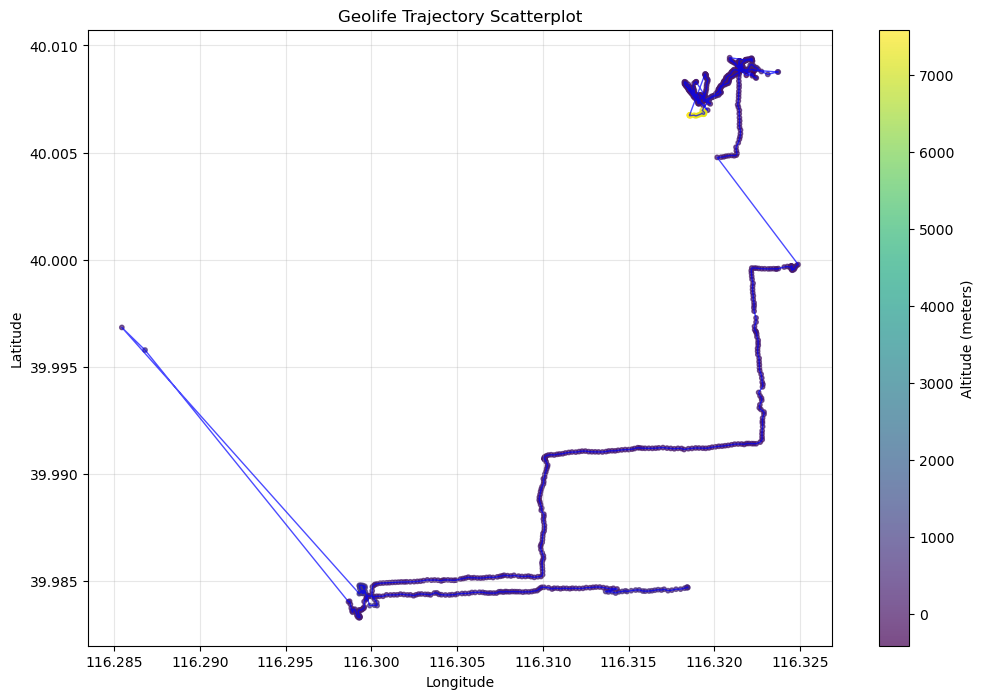

In [4]:
plt_df_1 = load_plt_file(r"../Data/GeoLife_Data/000/Trajectory/20081023025304.plt")
trajectory_scatterplot(plt_df_1)

In [5]:
plt_df_1

,latitude,longitude,zero_field,altitude_ft,date_days,date_string,time_string,timestamp
0,39.984702,116.318417,0,492,39744.120185,2008-10-23,02:53:04,2008-10-23 02:53:04
1,39.984683,116.318450,0,492,39744.120255,2008-10-23,02:53:10,2008-10-23 02:53:10
2,39.984686,116.318417,0,492,39744.120313,2008-10-23,02:53:15,2008-10-23 02:53:15
3,39.984688,116.318385,0,492,39744.120370,2008-10-23,02:53:20,2008-10-23 02:53:20
4,39.984655,116.318263,0,492,39744.120428,2008-10-23,02:53:25,2008-10-23 02:53:25
...,...,...,...,...,...,...,...,...
903,40.009172,116.321211,0,88,39744.465880,2008-10-23,11:10:52,2008-10-23 11:10:52
904,40.009204,116.321130,0,86,39744.465937,2008-10-23,11:10:57,2008-10-23 11:10:57
905,40.009243,116.321050,0,85,39744.465995,2008-10-23,11:11:02,2008-10-23 11:11:02
906,40.009269,116.320978,0,84,39744.466053,2008-10-23,11:11:07,2008-10-23 11:11:07


In [10]:
# function for interactive map visualization with plotly 
def path_map(df):

    fig = go.Figure()

    # create trajectory line with coordinate data
    fig.add_trace(go.Scattermapbox(
        lat = df['latitude'],
        lon = df['longitude'],
        mode = 'lines+markers',
        marker = dict(size = 6, color = 'blue'),
        line = dict(width = 3, color = 'red'),
        name = 'Path',
        text = df['timestamp'].astype(str),
        hoverinfo = 'text'
    ))

    # add start point
    fig.add_trace(go.Scattermapbox(
        lat = [df['latitude'].iloc[0]],
        lon = [df['longitude'].iloc[0]],
        mode = 'markers',
        marker = dict(size = 12, color = 'green'),
        name = 'Start Point',
        text = 'Start Point',
        hoverinfo = 'text'
    ))

    # add end point
    fig.add_trace(go.Scattermapbox(
        lat = [df['latitude'].iloc[-1]],
        lon = [df['longitude'].iloc[-1]],
        mode = 'markers',
        marker = dict(size = 12, color = 'red'),
        name = 'End Point',
        text = 'End Point',
        hoverinfo = 'text'
    ))

    # map layout
    fig.update_layout(
        title = 'Interactive Trajectory Map for GeoLife Session (Walking)',
        mapbox=dict(
            style = 'open-street-map',
            center = dict(lat = df['latitude'].mean(), lon = df['longitude'].mean()),
            zoom = 12
        ),
        height = 600,
        width = 800,
        showlegend = True
    )
    
    fig.show()

C:\Users\miria\AppData\Local\Temp\ipykernel_42916\3197481028.py:7: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\miria\AppData\Local\Temp\ipykernel_42916\3197481028.py:19: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\miria\AppData\Local\Temp\ipykernel_42916\3197481028.py:30: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



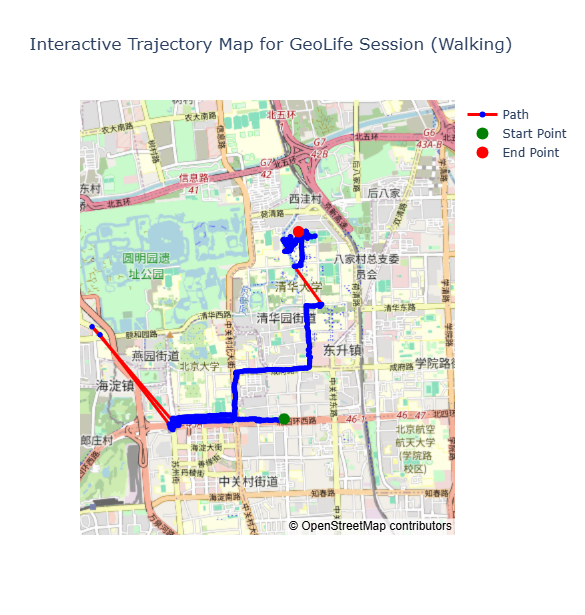

In [11]:
path_map(plt_df_1)